# Principal Component Analysis (PCA) Clustering Code to Select K-ensemble members from ECMWF-EPS:

#### Loading Python modules:

In [1]:
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Get the list of files:

In [2]:
# Get the list of files
files = [f for f in os.listdir('/scratch/bidc/DCC/EPS_ECMWF_2014110700/') if f.startswith('ECMWF_EPS_2014110700H12_') and f.endswith('.nc')]
files

['ECMWF_EPS_2014110700H12_42.nc',
 'ECMWF_EPS_2014110700H12_9.nc',
 'ECMWF_EPS_2014110700H12_25.nc',
 'ECMWF_EPS_2014110700H12_44.nc',
 'ECMWF_EPS_2014110700H12_35.nc',
 'ECMWF_EPS_2014110700H12_13.nc',
 'ECMWF_EPS_2014110700H12_49.nc',
 'ECMWF_EPS_2014110700H12_20.nc',
 'ECMWF_EPS_2014110700H12_41.nc',
 'ECMWF_EPS_2014110700H12_22.nc',
 'ECMWF_EPS_2014110700H12_18.nc',
 'ECMWF_EPS_2014110700H12_33.nc',
 'ECMWF_EPS_2014110700H12_12.nc',
 'ECMWF_EPS_2014110700H12_45.nc',
 'ECMWF_EPS_2014110700H12_32.nc',
 'ECMWF_EPS_2014110700H12_23.nc',
 'ECMWF_EPS_2014110700H12_50.nc',
 'ECMWF_EPS_2014110700H12_11.nc',
 'ECMWF_EPS_2014110700H12_19.nc',
 'ECMWF_EPS_2014110700H12_6.nc',
 'ECMWF_EPS_2014110700H12_31.nc',
 'ECMWF_EPS_2014110700H12_21.nc',
 'ECMWF_EPS_2014110700H12_34.nc',
 'ECMWF_EPS_2014110700H12_7.nc',
 'ECMWF_EPS_2014110700H12_26.nc',
 'ECMWF_EPS_2014110700H12_30.nc',
 'ECMWF_EPS_2014110700H12_27.nc',
 'ECMWF_EPS_2014110700H12_5.nc',
 'ECMWF_EPS_2014110700H12_15.nc',
 'ECMWF_EPS_201411

#### Defining function to read a variable from a netCDF file:

In [3]:
# Helper function to read a variable from a netCDF file
def read_var(file, var_name, level):
    with Dataset(file, 'r') as nc:
        var_data = nc.variables[var_name][level,:,:]
    return var_data.flatten()

#### Perform PCA:

In [38]:
# Perform PCA:
def perform_pca(data):
    pca = PCA(n_components=50)
    pca.fit(data)
    return pca

#### Extract variables:

In [5]:
cd /scratch/bidc/DCC/EPS_ECMWF_2014110700

/lus/h2resw01/scratch/bidc/DCC/EPS_ECMWF_2014110700


In [6]:
# Extract variables
T850 = np.array([read_var(f, "T_GDS0_ISBL", 0) for f in files])
T700 = np.array([read_var(f, "T_GDS0_ISBL", 7) for f in files])
T500 = np.array([read_var(f, "T_GDS0_ISBL", 6) for f in files])

Z850 = np.array([read_var(f, "Z_GDS0_ISBL", 9) for f in files])
Z700 = np.array([read_var(f, "Z_GDS0_ISBL", 8) for f in files])
Z500 = np.array([read_var(f, "Z_GDS0_ISBL", 7) for f in files])

U850 = np.array([read_var(f, "U_GDS0_ISBL", 9) for f in files])
U700 = np.array([read_var(f, "U_GDS0_ISBL", 8) for f in files])
U500 = np.array([read_var(f, "U_GDS0_ISBL", 7) for f in files])

V850 = np.array([read_var(f, "V_GDS0_ISBL", 9) for f in files])
V700 = np.array([read_var(f, "V_GDS0_ISBL", 8) for f in files])
V500 = np.array([read_var(f, "V_GDS0_ISBL", 7) for f in files])

R850 = np.array([read_var(f, "R_GDS0_ISBL", 6) for f in files])
R700 = np.array([read_var(f, "R_GDS0_ISBL", 5) for f in files])
R500 = np.array([read_var(f, "R_GDS0_ISBL", 4) for f in files])

In [180]:
np.shape(T850)

(50, 161, 261)

#### Plotting a variable of interest:

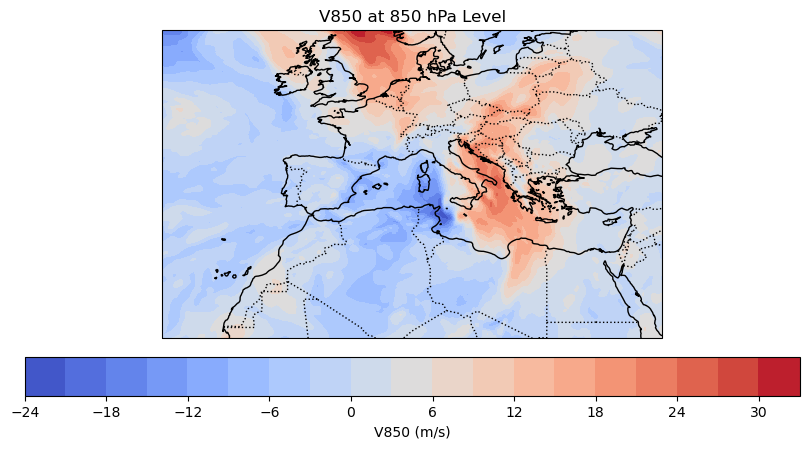

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

# Get the list of files
files = [f for f in os.listdir('/scratch/bidc/DCC/EPS_ECMWF_2014110700/') if f.startswith('ECMWF_EPS_2014110700H12_') and f.endswith('.nc')]

# Read the first file to get the dimensions and coordinates
with Dataset(files[0], 'r') as nc:
    lons      = nc.variables['g0_lon_1'][:]
    lats      = nc.variables['g0_lat_0'][:]
    V850_test = nc.variables['V_GDS0_ISBL'][8,:,:]  # Assuming level 8 is the 850 hPa level
    


# Plotting
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

lon,lat = np.meshgrid(lons,lats)


# Plot the data
contour = ax.contourf(lon, lat, V850_test, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('V850 (m/s)')

# Add title
plt.title('V850 at 850 hPa Level')

# Show plot
plt.show()


#### Perform PCA:

In [40]:
PCt500 = perform_pca(T500)
PCt700 = perform_pca(T700)
PCt850 = perform_pca(T850)

PCz500 = perform_pca(Z500)
PCz700 = perform_pca(Z700)
PCz850 = perform_pca(Z850)

PCu500 = perform_pca(U500)
PCu700 = perform_pca(U700)
PCu850 = perform_pca(U850)

PCv500 = perform_pca(V500)
PCv700 = perform_pca(V700)
PCv850 = perform_pca(V850)

PCr500 = perform_pca(R500)
PCr700 = perform_pca(R700)
PCr850 = perform_pca(R850)

In [41]:
PCr500.explained_variance_

array([1.6214138e+05, 1.5962444e+05, 1.2967120e+05, 1.1012840e+05,
       1.0731456e+05, 9.7793023e+04, 9.1247828e+04, 8.7349602e+04,
       8.5277719e+04, 7.6082992e+04, 7.4119531e+04, 7.2660055e+04,
       6.9229672e+04, 6.6888195e+04, 6.2004586e+04, 6.0902516e+04,
       6.0012695e+04, 5.6211617e+04, 5.3580262e+04, 5.0536270e+04,
       4.7713867e+04, 4.5954594e+04, 4.2805082e+04, 4.1406961e+04,
       3.9795688e+04, 3.9054902e+04, 3.5827984e+04, 3.4911387e+04,
       3.3619145e+04, 3.2249639e+04, 3.0230525e+04, 2.8297408e+04,
       2.8053107e+04, 2.7617857e+04, 2.6864326e+04, 2.6417809e+04,
       2.5747074e+04, 2.4964480e+04, 2.4287873e+04, 2.3669715e+04,
       2.2424152e+04, 2.2203676e+04, 2.1610559e+04, 2.1554943e+04,
       1.9903963e+04, 1.9522346e+04, 1.8659982e+04, 1.8329082e+04,
       1.7569326e+04, 1.1908220e-06], dtype=float32)

#### Plotting some principal components:

In [42]:
np.shape(principal_components)

(42021, 3)

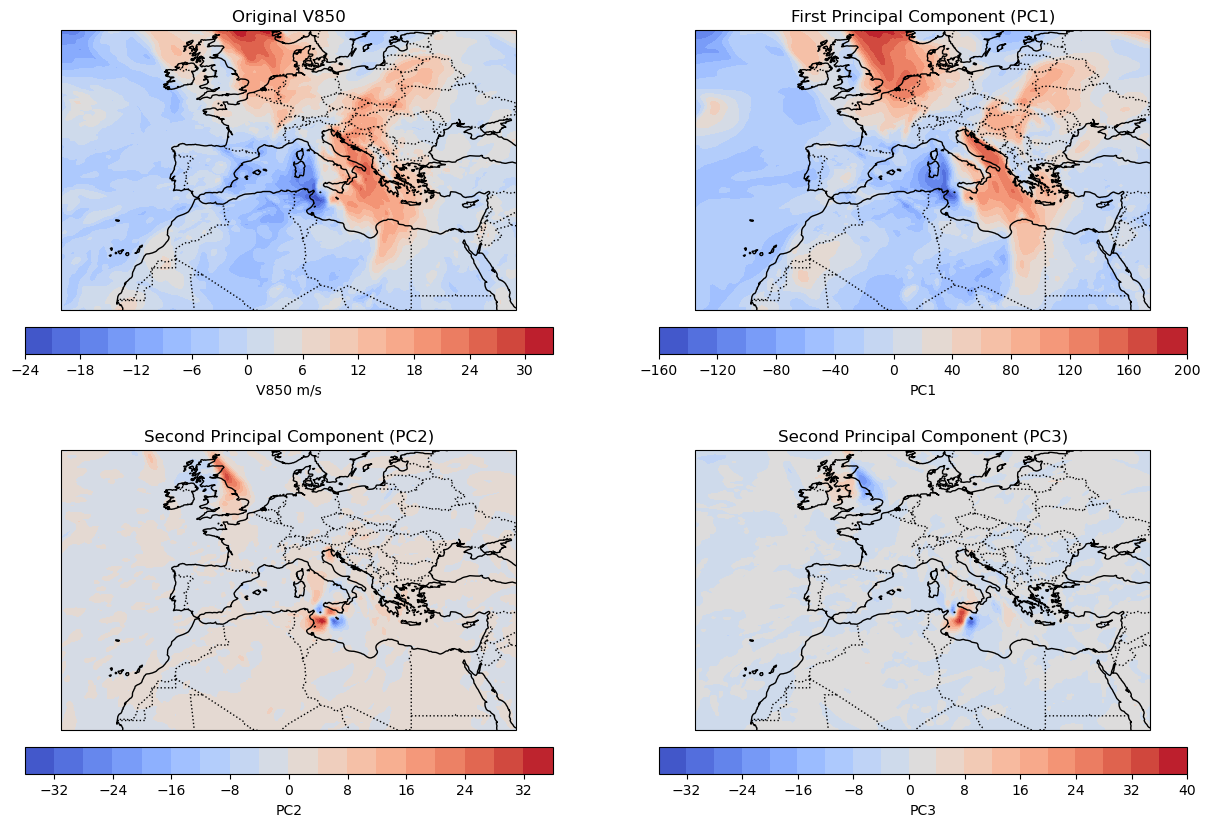

In [43]:
pca = PCA(n_components=3)

# Read the first file to get the dimensions and coordinates
with Dataset(files[0], 'r') as nc:
    V850_test = nc.variables['V_GDS0_ISBL'][8,:,:]  # Assuming level 8 is the 850 hPa level
    
#print(np.shape(V850_test))

# Transform the original data to get the principal components
principal_components = pca.fit_transform(V850.T)

# Extract the first two principal components
pc1 = principal_components[:, 0].reshape(np.shape(V850_test)[0], np.shape(V850_test)[1])
pc2 = principal_components[:, 1].reshape(np.shape(V850_test)[0], np.shape(V850_test)[1])
pc3 = principal_components[:, 2].reshape(np.shape(V850_test)[0], np.shape(V850_test)[1])


# Output the shapes to verify correctness
#print("Shape of original V850 data:", V850_data.shape)
#print("Shape of principal components:", principal_components.shape)
#print("Shape of first principal component (PC1):", pc1.shape)
#print("Shape of second principal component (PC2):", pc2.shape)

# Output some values to verify
#print("First Principal Component (PC1) values:", pc1)
#print("Second Principal Component (PC2) values:", pc2)

# Plotting the first and second principal components
fig, ax = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Original
contour1 = ax[0,0].contourf(lons, lats, V850_test, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
ax[0,0].add_feature(cfeature.COASTLINE)
ax[0,0].add_feature(cfeature.BORDERS, linestyle=':')
ax[0,0].set_title('Original V850')
cbar1 = plt.colorbar(contour1, ax=ax[0,0], orientation='horizontal', pad=0.05)
cbar1.set_label('V850 m/s')

# Plot PC1
contour1 = ax[0,1].contourf(lons, lats, pc1, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
ax[0,1].add_feature(cfeature.COASTLINE)
ax[0,1].add_feature(cfeature.BORDERS, linestyle=':')
ax[0,1].set_title('First Principal Component (PC1)')
cbar1 = plt.colorbar(contour1, ax=ax[0,1], orientation='horizontal', pad=0.05)
cbar1.set_label('PC1')

# Plot PC2
contour2 = ax[1,0].contourf(lons, lats, pc2, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
ax[1,0].add_feature(cfeature.COASTLINE)
ax[1,0].add_feature(cfeature.BORDERS, linestyle=':')
ax[1,0].set_title('Second Principal Component (PC2)')
cbar2 = plt.colorbar(contour2, ax=ax[1,0], orientation='horizontal', pad=0.05)
cbar2.set_label('PC2')

# Plot PC3
contour2 = ax[1,1].contourf(lons, lats, pc3, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
ax[1,1].add_feature(cfeature.COASTLINE)
ax[1,1].add_feature(cfeature.BORDERS, linestyle=':')
ax[1,1].set_title('Second Principal Component (PC3)')
cbar2 = plt.colorbar(contour2, ax=ax[1,1], orientation='horizontal', pad=0.05)
cbar2.set_label('PC3')

# Show plot
plt.show()

#### Select number of principal components to explain at least 90% variance:


In [29]:
# Select number of principal components to explain at least 90% variance
def select_n_components(pca):
    var_cum = np.cumsum(pca.explained_variance_ratio_)
    return np.argmax(var_cum >= 0.9) + 1

l = [PCt500, PCt700, PCt850, PCz500, PCz700, PCz850, PCr500, PCr700, PCr850]
coord = [select_n_components(pca) for pca in l]

#print(PCt500.explained_variance_ratio_)
print(coord)
print(np.shape(PCt500))

[33, 36, 23, 19, 20, 21, 37, 38, 39]
()


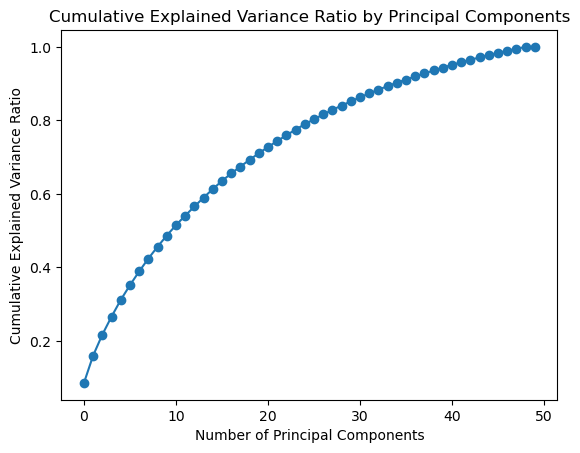

In [24]:
# Plot explained variance ratio
explained_variance_ratio = PCv850.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

#### Combine selected components:

In [235]:
# Combine selected components:
popul = np.hstack([
    PCt500.transform(T500)[:, :coord[0]], PCt700.transform(T700)[:, :coord[1]], PCt850.transform(T850)[:, :coord[2]],
    PCz500.transform(Z500)[:, :coord[3]], PCz700.transform(Z700)[:, :coord[4]], PCz850.transform(Z850)[:, :coord[5]],
    PCr500.transform(R500)[:, :coord[6]], PCr700.transform(R700)[:, :coord[7]], PCr850.transform(R850)[:, :coord[8]]
])

print('shape popul: ', np.shape(popul))

shape popul:  (50, 266)


#### Perform clustering:

In [266]:
# Perform clustering
num_clust = 5
km = KMeans(n_clusters=num_clust)
km.fit(popul)
centers = km.cluster_centers_
labels = km.labels_

#print(np.shape(centers))
print(labels)

[2 2 0 1 4 1 1 0 1 4 2 4 4 0 0 2 0 3 3 1 2 1 2 1 4 0 1 0 4 3 3 2 1 2 2 1 1
 3 2 2 0 1 1 1 2 2 3 3 3 1]


/perm/bidc/conda/envs/Dorita_Project/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Organize cluster members:

In [262]:
# Organize cluster members
ordered_indices = np.argsort(labels)
members = np.array([files, labels+1]).T[ordered_indices]

print(members)

[['ECMWF_EPS_2014110700H12_19.nc' '1']
 ['ECMWF_EPS_2014110700H12_46.nc' '1']
 ['ECMWF_EPS_2014110700H12_17.nc' '1']
 ['ECMWF_EPS_2014110700H12_11.nc' '1']
 ['ECMWF_EPS_2014110700H12_1.nc' '1']
 ['ECMWF_EPS_2014110700H12_38.nc' '1']
 ['ECMWF_EPS_2014110700H12_29.nc' '1']
 ['ECMWF_EPS_2014110700H12_49.nc' '2']
 ['ECMWF_EPS_2014110700H12_13.nc' '2']
 ['ECMWF_EPS_2014110700H12_6.nc' '2']
 ['ECMWF_EPS_2014110700H12_44.nc' '2']
 ['ECMWF_EPS_2014110700H12_24.nc' '2']
 ['ECMWF_EPS_2014110700H12_37.nc' '2']
 ['ECMWF_EPS_2014110700H12_33.nc' '2']
 ['ECMWF_EPS_2014110700H12_35.nc' '2']
 ['ECMWF_EPS_2014110700H12_4.nc' '2']
 ['ECMWF_EPS_2014110700H12_41.nc' '2']
 ['ECMWF_EPS_2014110700H12_10.nc' '2']
 ['ECMWF_EPS_2014110700H12_8.nc' '2']
 ['ECMWF_EPS_2014110700H12_16.nc' '2']
 ['ECMWF_EPS_2014110700H12_25.nc' '3']
 ['ECMWF_EPS_2014110700H12_5.nc' '3']
 ['ECMWF_EPS_2014110700H12_27.nc' '3']
 ['ECMWF_EPS_2014110700H12_30.nc' '3']
 ['ECMWF_EPS_2014110700H12_21.nc' '3']
 ['ECMWF_EPS_2014110700H12_31.

#### Calculate distances and select nearest members to centroids:


In [263]:
# Calculate distances and select nearest members to centroids:
results = []
for cluster in range(num_clust):
    cluster_indices = np.where(labels == cluster)[0]
    if len(cluster_indices) == 0:
        continue
    # Calculate the Euclidean distance from each member of the cluster to the cluster centroid:
    distances = np.sum((popul[cluster_indices] - centers[cluster]) ** 2, axis=1)
    min_index = cluster_indices[np.argmin(distances)]
    results.append([files[min_index], cluster])

print('CLUSTERING RESULTS')
for result in results:
    print(result)

CLUSTERING RESULTS
['ECMWF_EPS_2014110700H12_17.nc', 0]
['ECMWF_EPS_2014110700H12_16.nc', 1]
['ECMWF_EPS_2014110700H12_50.nc', 2]
['ECMWF_EPS_2014110700H12_20.nc', 3]
['ECMWF_EPS_2014110700H12_23.nc', 4]
